In [1]:
import pandas as pd
import numpy as np 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("finproclean.csv") 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   TotalChargesNum                          7043 non-null   float64
 10  MultipleLines_No                         7043 no

In [10]:
x= df[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]].values
y= df["Churn"].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [23]:
model = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
# 10 Folds Cross Validation 
clf_score= cross_val_score(model, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78706625 0.78233438 0.82176656 0.79022082 0.8044164  0.78233438
 0.78548896 0.77760252 0.78672986 0.79304897]


0.7911009114875338

In [25]:
y_pred = model.predict(x_test)

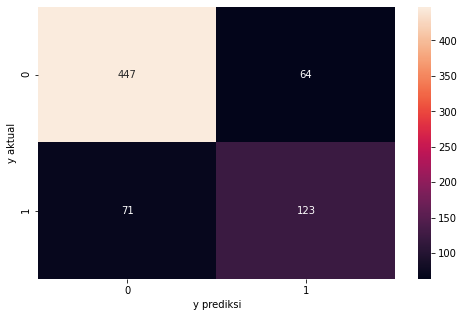

In [26]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [17]:
labels = ['Not Churned', 'Churned']

In [27]:
Best = pd.DataFrame(classification_report(y_test,y_pred, target_names= labels, output_dict=True)).T

In [28]:
Best

,precision,recall,f1-score,support
Not Churned,0.862934,0.874755,0.868805,511.000000
Churned,0.657754,0.634021,0.645669,194.000000
accuracy,0.808511,0.808511,0.808511,0.808511
macro avg,0.760344,0.754388,0.757237,705.000000
weighted avg,0.806473,0.808511,0.807403,705.000000


In [29]:
import joblib

In [30]:
joblib.dump(model, "model_joblib")

['model_joblib']